In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
root_path = "/content/drive/My Drive/Varuna Hackathon 2022"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!ls "$root_path"

 Grid_AOI	       sentinel-2-image   training_area
'Presentation Slide'   testing_area


In [4]:
!pip install rasterio
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import rasterio
import rasterio.mask
import geopandas as gpd

import matplotlib.pyplot as plt
from rasterio import plot

from tqdm import tqdm

In [6]:
path_2021 = f'{root_path}/sentinel-2-image/2021'
path_2020 = f'{root_path}/sentinel-2-image/2020'

In [7]:
def read_band(year_path, date, band_name):
    date_path = f'{year_path}/{date}'
    band_path = f'{date_path}/IMG_DATA/47PQS_{date}_{band_name}.jp2'
    band = rasterio.open(band_path)
    return band

In [8]:
train_shape = gpd.read_file(f'{root_path}/training_area/traindata.shp')
test_shape = gpd.read_file(f'{root_path}/testing_area/testdata.shp')

train_crs = train_shape.to_crs({'init': 'epsg:32647'})
test_crs = test_shape.to_crs({'init': 'epsg:32647'})

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [9]:
date = '20210101'
band2 = read_band(path_2021, date, 'B02')
band3 = read_band(path_2021, date, 'B03')
band4 = read_band(path_2021, date, 'B04')

In [10]:
aot = read_band(path_2021, date, 'AOT')

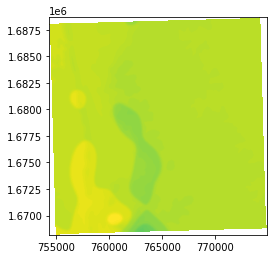

In [11]:
plot.show(aot, transform=aot.transform)

In [12]:
with rasterio.open(f'{date}.tiff','w',driver='Gtiff', width=band4.width, height=band4.height, 
              count=3,crs=band4.crs,transform=band4.transform, dtype=band4.dtypes[0]) as rgb:
    rgb.write(band2.read(1),1) 
    rgb.write(band3.read(1),2) 
    rgb.write(band4.read(1),3) 
    rgb.close()

In [13]:
with rasterio.open(f'{date}.tiff') as src:
    out_image, out_transform = rasterio.mask.mask(src, train_crs.geometry, crop=False)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
    
with rasterio.open(f'{date}-RGB_masked.tif', "w", **out_meta) as dest:
    dest.write(out_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


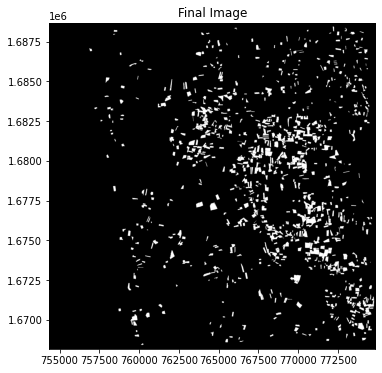

In [14]:
src = rasterio.open('20210101-RGB_masked.tif')
plt.figure(figsize=(6, 6))
plt.title('Final Image')
plot.show(src.read(), transform=src.transform)
# plot.show(src.read(), adjust=True)

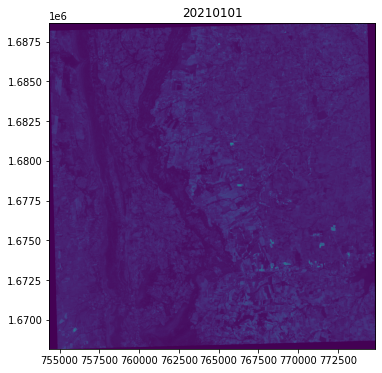

In [15]:
src = rasterio.open('20210101.tiff')
plt.figure(figsize=(6, 6))
plt.title('20210101')
plot.show(src, transform=src.transform)

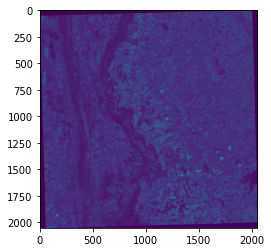

In [16]:
plt.imshow(src.read()[1])

In [17]:
src.read().shape

(3, 2051, 2051)

In [18]:
dates_2021 = ["20210101", "20210106", "20210111", "20210116", "20210121", "20210126", "20210205", "20210210", "20210215", "20210220", "20210225", "20210302", "20210307", "20210312", "20210317", "20210322", "20210327", "20210401", "20210406", "20210411", "20210416", "20210421", "20210426", "20210501", "20210506", "20210511", "20210516", "20210521", "20210526", "20210531", "20210605", "20210610", "20210615", "20210620", "20210625", "20210630", "20210705", "20210710", "20210715", "20210720", "20210725", "20210730", "20210804", "20210809", "20210814", "20210819", "20210824", "20210829", "20210903", "20210908", "20210913", "20210918", "20210923", "20210928", "20211003", "20211008", "20211013", "20211018", "20211023", "20211028", "20211102", "20211107", "20211117", "20211122", "20211127", "20211202", "20211207", "20211212", "20211217", "20211222", "20211227"]
print(len(dates_2021))

71


In [19]:
def save_tiff(filename, bands):
    with rasterio.open(f'{filename}.tiff','w',driver='Gtiff', width=bands[0].width, height=bands[0].height, 
              count=len(bands),crs=bands[0].crs,transform=bands[0].transform, dtype=bands[0].dtypes[0]) as tiff_file:
        for i in range(1, len(bands)+1):
            tiff_file.write(bands[i].read(1), i)
        tiff_file.close()

In [70]:
np.unique(ndvi_img)

array([-1.        , -0.91666667, -0.90909091, ...,  0.94736842,
        1.        ,         nan])

In [65]:
ndvi_img[:, :, None].shape

(2051, 2051, 1)

In [92]:
ndvi_img.shape

(2051, 2051)

In [20]:
from skimage.io import imsave, imread

In [110]:
len(np.unique(ndvi_img))

1887927

In [108]:
imsave('20210101.png', ndvi_img)

In [107]:
img = imread('20210101.jpg')
np.unique(img)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [93]:
from PIL import Image
im = Image.fromarray(ndvi_img[:, :])
im = im.convert('L')
im.save(f"{date}.png")

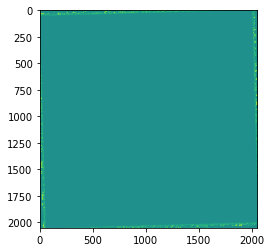

In [94]:
img = Image.open('20210101.png').convert('L')
# plt.show(img)
plt.imshow(img, vmin=-1, vmax=1)

In [90]:
np.unique(img)

array([0, 1], dtype=uint8)

In [20]:
for date in dates_2021:
    ndvi_img = create_ndvi(date)
    save_tiff(date, [ndvi_img])
    break

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


AttributeError: ignored

In [21]:
ndvi_img

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [23]:
src.read().shape

(3, 2051, 2051)

In [24]:
src.index(774604.014, 1671240.055)

(1744, 2024)

In [25]:
img = src.read()
img[0, 1744, 2024]

900

In [ ]:
np.unique(img)

In [28]:
src.index(773367.837, 1670278.438)

(1841, 1900)

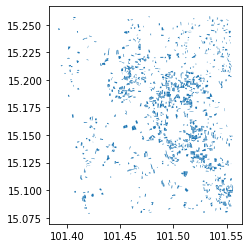

In [48]:
train_shape = train_shape.to_crs("EPSG:4326")
train_shape.geometry.plot()

In [21]:
def create_ndvi(date):
    band8 = read_band(path_2021, date, 'B08').read(1).astype(float)
    band4 = read_band(path_2021, date, 'B04').read(1).astype(float)
    NDVI = (band8 - band4) / (band8 + band4)
    return NDVI

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


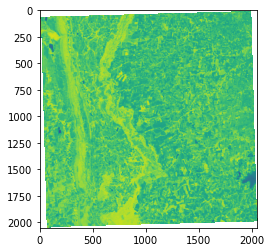

In [22]:
ndvi_img = create_ndvi(date)
plot.show(ndvi_img)

In [ ]:
from xml.dom import minidom

metadata_path = f'{path_2021}/{date}/metadata.xml'
xmldoc = minidom.parse(metadata_path)
nodes = xmldoc.getElementsByTagName("ps:bandSpecificMetadata")

In [ ]:
xmldoc.childNodes[0]

<DOM Element: n1:Level-2A_Tile_ID at 0x7fadce46ae10>

In [23]:
from rasterio.features import rasterize



In [22]:
import torch
import torch.nn as nn

def double_conv(in_channels, out_channels):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True),
        nn.Conv2d(out_channels, out_channels, 3, padding=1),
        nn.ReLU(inplace=True)
    )   


class UNet(nn.Module):
    def __init__(self, n_class, in_channels=1):
        super().__init__()
        
        self.n_class = n_class
                
        self.dconv_down1 = double_conv(in_channels, 64)
        self.dconv_down2 = double_conv(64, 128)
        self.dconv_down3 = double_conv(128, 256)
        self.dconv_down4 = double_conv(256, 512)        

        self.maxpool = nn.MaxPool2d(2)
        self.upsample = nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True)        
        
        self.dconv_up3 = double_conv(256 + 512, 256)
        self.dconv_up2 = double_conv(128 + 256, 128)
        self.dconv_up1 = double_conv(128 + 64, 64)
        
        self.conv_last = nn.Conv2d(64, n_class, 1)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        conv1 = self.dconv_down1(x)
        x = self.maxpool(conv1)

        conv2 = self.dconv_down2(x)
        x = self.maxpool(conv2)
        
        conv3 = self.dconv_down3(x)
        x = self.maxpool(conv3)   
        
        x = self.dconv_down4(x)
        
        x = self.upsample(x)        
        x = torch.cat([x, conv3], dim=1)
        
        x = self.dconv_up3(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv2], dim=1)       

        x = self.dconv_up2(x)
        x = self.upsample(x)        
        x = torch.cat([x, conv1], dim=1)   
        
        x = self.dconv_up1(x)
        
        out = self.conv_last(x)
        return out


In [24]:
model = UNet(n_class=5, in_channels=1)
device = torch.device('cuda')
model = model.to(device)

In [50]:
import numpy as np
np.unique(ndvi_img)

array([-1.        , -0.91666667, -0.90909091, ...,  0.94736842,
        1.        ,         nan])

In [57]:
from torchvision.io import read_image

train_mask = read_image('train_mask.png').to(device, dtype=torch.float32)
ndvi_tensor = torch.from_numpy(ndvi_img).to(device, dtype=torch.float32)
print(ndvi_tensor.shape)
model(ndvi_tensor[None, None, :2048, :2048])

torch.Size([2051, 2051])


RuntimeError: ignored

In [24]:
from rasterio.features import rasterize

img_profile = aot.profile
label = train_shape.to_crs(img_profile['crs'])

img = rasterize(
    shapes=[(row.geometry, int(row.crop_type)) for i, row in label.iterrows()], # Construct polygon and value tuples
    out_shape=(img_profile['width'], img_profile['height']),
    transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
)
img.shape

(2051, 2051)

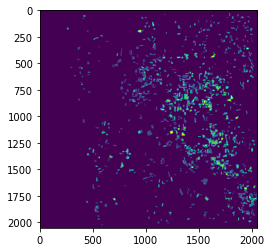

In [25]:
plt.imshow(img)

In [26]:
imsave('20210101_y.png', img)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: 20210101_y.png is a low contrast image
  """Entry point for launching an IPython kernel.


In [27]:
img = rasterize(
    shapes=[(label.iloc[0].geometry, int(label.iloc[0].crop_type))], # Construct polygon and value tuples
    out_shape=(img_profile['width'], img_profile['height']),
    transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
)

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


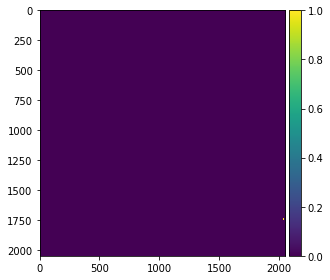

In [32]:
from skimage import io

io.imshow(img,)

In [31]:
import numpy as np

np.unique(img)

array([0, 1], dtype=uint8)

In [130]:
dates_2021[0]

'20210101'

In [132]:
from datetime import datetime

dt = datetime.strptime(dates_2021[0], '%Y%m%d')
dt.month

1

In [142]:
ndvi_months = [[] * 0] * 12
ndvi_months

[[], [], [], [], [], [], [], [], [], [], [], []]

In [1]:
months = [None] * len(dates_2021)

for i, date in enumerate(dates_2021):
    dt = datetime.strptime(date, '%Y%m%d')
    months[i] = dt.month

months = np.array(months)
print(months)

NameError: ignored

In [ ]:
np.array(ndvi_months).shape

In [ ]:
m = 2
indexes = np.where(months == m)[0]
start = indexes[0]
end = indexes[-1]
ndvi_months[start:end+1]

In [159]:
np.where(np.array(months) == '1')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


(array([], dtype=int64),)

In [143]:
average_ndvi = np.zeros((len(dates_2021), label.shape[0]))

ndvi_images = []
ndvi_months = [[] * 0] * 12
    
for t, date in enumerate(dates_2021):
    print(date)
    dt = datetime.strptime(date, '%Y%m%d')
    ndvi_images.append(create_ndvi(date))

for i in tqdm(range(label.shape[0])):
    img = rasterize(
        shapes=[(label.iloc[i].geometry, int(label.iloc[i].crop_type))], # Construct polygon and value tuples
        out_shape=(img_profile['width'], img_profile['height']),
        transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
    )

    indexes = np.where(img == 1)
    N = len(indexes[0])

    for t, date in enumerate(dates_2021):
        print(date)
        dt = datetime.strptime(date, '%Y%m%d')

        ndvi_list = np.zeros(N)
        for j in range(N):
            ndvi_list[j] = ndvi_img[indexes[0][j], indexes[1][j]]
        average_ndvi[i, t] = np.mean(ndvi_list)

        ndvi_months[dt.month].append(ndvi_img)
    break

# average_ndvi = np.nan_to_num(average_ndvi[:, :, None])

20210101


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


20210106
20210111
20210116
20210121
20210126
20210205
20210210
20210215
20210220
20210225
20210302
20210307
20210312
20210317
20210322
20210327
20210401
20210406
20210411
20210416
20210421
20210426
20210501
20210506
20210511
20210516
20210521
20210526
20210531
20210605
20210610
20210615
20210620
20210625
20210630
20210705
20210710
20210715
20210720
20210725
20210730
20210804
20210809
20210814
20210819
20210824
20210829
20210903
20210908
20210913
20210918
20210923
20210928
20211003
20211008
20211013
20211018
20211023
20211028
20211102
20211107
20211117
20211122
20211127
20211202
20211207
20211212
20211217
20211222
20211227


  0%|          | 0/1317 [00:00<?, ?it/s]

20210101
20210106
20210111
20210116
20210121
20210126
20210205
20210210
20210215
20210220
20210225
20210302
20210307
20210312
20210317
20210322
20210327
20210401
20210406
20210411
20210416
20210421
20210426
20210501
20210506
20210511
20210516
20210521
20210526
20210531
20210605
20210610
20210615
20210620
20210625
20210630
20210705
20210710
20210715
20210720
20210725
20210730
20210804
20210809
20210814
20210819
20210824
20210829
20210903
20210908
20210913
20210918
20210923
20210928
20211003
20211008
20211013
20211018
20211023
20211028
20211102
20211107
20211117
20211122
20211127
20211202


IndexError: ignored

In [126]:
average_ndvi = np.zeros((len(dates_2021), label.shape[0]))
for i in tqdm(range(label.shape[0])):
    img = rasterize(
        shapes=[(label.iloc[i].geometry, int(label.iloc[i].crop_type))], # Construct polygon and value tuples
        out_shape=(img_profile['width'], img_profile['height']),
        transform=img_profile['transform']                                          # This will make every pixel in the target image align correctly with satellite image
    )

    indexes = np.where(img == 1)
    N = len(indexes[0])

    for t, date in enumerate(dates_2021):
        ndvi_img = create_ndvi(date)

        ndvi_list = np.zeros(N)
        for j in range(N):
            ndvi_list[j] = ndvi_img[indexes[0][j], indexes[1][j]]
        average_ndvi[i, t] = np.mean(ndvi_list)

average_ndvi = np.nan_to_num(average_ndvi[:, :, None])

  0%|          | 0/1317 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
  0%|          | 3/1317 [02:37<18:57:08, 51.92s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  0%|          | 4/1317 [03:50<20:58:56, 57.53s/it]


KeyboardInterrupt: ignored

In [ ]:
average_ndvi.shape

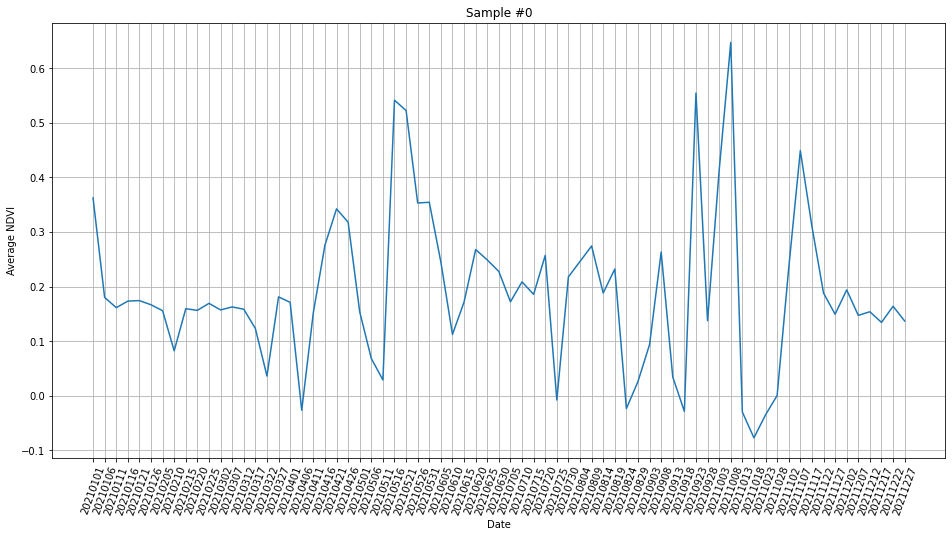

In [123]:
sample_id = 0
fig, ax = plt.subplots(1, 1, figsize=(16,8))
ax.plot(dates_2021, average_ndvi[sample_id])
ax.set_xlabel('Date')
ax.set_ylabel('Average NDVI')
ax.set_title(f"Sample #{sample_id}")
plt.xticks(rotation=70)
plt.grid()
plt.savefig(f'average_NDVI-sample_{sample_id}.png', bbox_inches='tight')
plt.show()

In [89]:
Y_all = np.array(train_shape.crop_type.to_list(), dtype=int)

In [90]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
Y_pred = gnb.fit(average_ndvi, Y_all).predict(average_ndvi)

In [91]:
average_ndvi.shape

(1317, 1)

In [93]:
Y_all.shape

(1317,)

In [94]:
sum(Y_pred == Y_all) / len(Y_all)

0.7160212604403948

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(average_ndvi, Y_all)

In [97]:
gnb = GaussianNB()
Y_val_pred = gnb.fit(X_train, Y_train).predict(X_val)

In [99]:
sum(Y_val_pred == Y_val) / len(Y_val)

0.7212121212121212

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


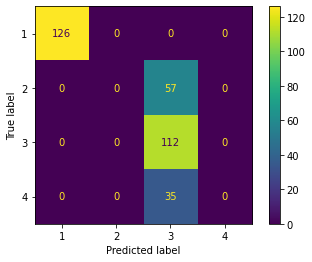

In [100]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gnb, X_val, Y_val)

In [105]:
from osgeo import gdal

filepath = r"LandsatData/LC81910182016153LGN00_sr_band4.tif"
raster = gdal.Open(filepath)